Spatial Correlation between sea surface temperature anomaly and sea surface height anomaly
===========================
#### Author: Jinbo Wang <Jinbo.Wang@jpl.nasa.gov>
#### Date: 12/13/2021

Jinbo's original code, unmodified.

In [1]:
from matplotlib import pylab as plt
import xarray as xr
import numpy as np

# Getting data from Cloud

## Get your s3credential and a handle to the S3 file system

In [5]:
def init_S3FileSystem():
    import requests,s3fs
    s3_cred_endpoint = {
        'podaac':'https://archive.podaac.earthdata.nasa.gov/s3credentials',
        'lpdaac':'https://data.lpdaac.earthdatacloud.nasa.gov/s3credentials'}

    temp_creds_url = s3_cred_endpoint['podaac']
    creds = requests.get(temp_creds_url).json()
    s3 = s3fs.S3FileSystem(anon=False,
                           key=creds['accessKeyId'],
                           secret=creds['secretAccessKey'], 
                           token=creds['sessionToken'])
    return s3

In [6]:
s3sys=init_S3FileSystem()

# Write out all SSH files
ssh_path = 's3://podaac-ops-cumulus-protected/SEA_SURFACE_HEIGHT_ALT_GRIDS_L4_2SATS_5DAY_6THDEG_V_JPL1812/*.nc'
ssh_fns=s3sys.glob(ssh_path)
print(len(ssh_fns))
with open('FileNames.SEA_SURFACE_HEIGHT_ALT_GRIDS_L4_2SATS_5DAY_6THDEG.txt','w') as ff:
    for a in ssh_fns:
        ff.write("%s\n"%a)


## Read MEaSURES-SSH grid data from cloud

In [19]:
ssh_path = 's3://podaac-ops-cumulus-protected/SEA_SURFACE_HEIGHT_ALT_GRIDS_L4_2SATS_5DAY_6THDEG_V_JPL1812/*201801*.nc'
ssh_fns=s3sys.glob(ssh_path)
ssh_fns

['podaac-ops-cumulus-protected/SEA_SURFACE_HEIGHT_ALT_GRIDS_L4_2SATS_5DAY_6THDEG_V_JPL1812/ssh_grids_v1812_2018010412.nc',
 'podaac-ops-cumulus-protected/SEA_SURFACE_HEIGHT_ALT_GRIDS_L4_2SATS_5DAY_6THDEG_V_JPL1812/ssh_grids_v1812_2018010912.nc',
 'podaac-ops-cumulus-protected/SEA_SURFACE_HEIGHT_ALT_GRIDS_L4_2SATS_5DAY_6THDEG_V_JPL1812/ssh_grids_v1812_2018011412.nc',
 'podaac-ops-cumulus-protected/SEA_SURFACE_HEIGHT_ALT_GRIDS_L4_2SATS_5DAY_6THDEG_V_JPL1812/ssh_grids_v1812_2018011912.nc',
 'podaac-ops-cumulus-protected/SEA_SURFACE_HEIGHT_ALT_GRIDS_L4_2SATS_5DAY_6THDEG_V_JPL1812/ssh_grids_v1812_2018012412.nc',
 'podaac-ops-cumulus-protected/SEA_SURFACE_HEIGHT_ALT_GRIDS_L4_2SATS_5DAY_6THDEG_V_JPL1812/ssh_grids_v1812_2018012912.nc']

In [5]:
#use 01/04/2018 
ssh=xr.open_dataset(s3sys.open('podaac-ops-cumulus-protected/SEA_SURFACE_HEIGHT_ALT_GRIDS_L4_2SATS_5DAY_6THDEG_V_JPL1812/ssh_grids_v1812_2018010412.nc'))
ssh

<xarray.Dataset>
Dimensions:      (Longitude: 2160, nv: 2, Latitude: 960, Time: 1)
Coordinates:
  * Longitude    (Longitude) float32 0.08333 0.25 0.4167 ... 359.6 359.8 359.9
  * Latitude     (Latitude) float32 -79.92 -79.75 -79.58 ... 79.58 79.75 79.92
  * Time         (Time) datetime64[ns] 2018-01-04T12:00:00
Dimensions without coordinates: nv
Data variables:
    Lon_bounds   (Longitude, nv) float32 ...
    Lat_bounds   (Latitude, nv) float32 ...
    Time_bounds  (Time, nv) datetime64[ns] ...
    SLA          (Time, Longitude, Latitude) float32 ...
    SLA_ERR      (Time, Longitude, Latitude) float32 ...
Attributes: (12/13)
    Conventions:            CF-1.6
    ncei_template_version:  NCEI_NetCDF_Grid_Template_v2.0
    Institution:            Jet Propulsion Laboratory
    geospatial_lat_min:     -79.916664
    geospatial_lat_max:     79.916664
    geospatial_lon_min:     0.083333336
    ...                     ...
    time_coverage_start:    2018-01-04
    time_coverage_end:      2018-01-04
    date_created:           2019-02-11T20:51:21.172490
    version_number:         1812
    summary:                Sea level anomaly grids from altimeter data using...
    title:                  Sea Level Anormaly Estimate based on Altimeter Data

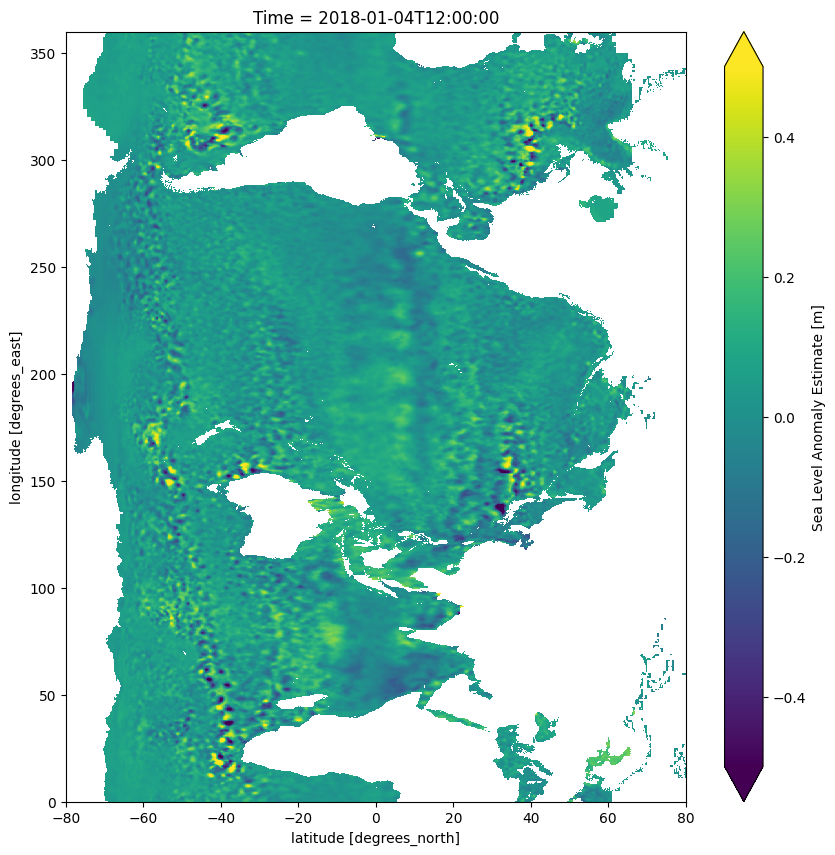

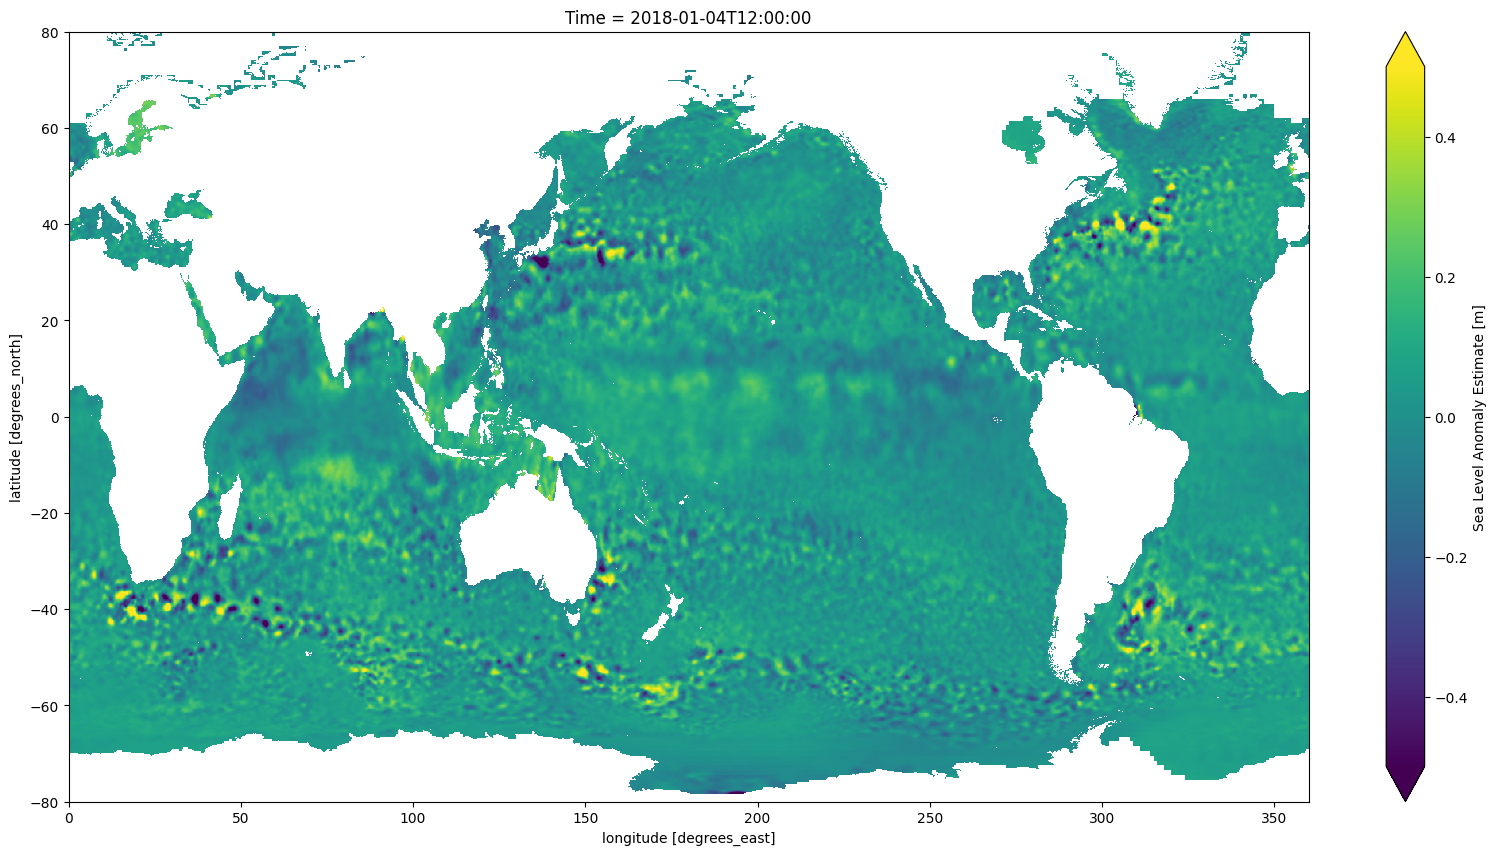

In [16]:
fig,ax=plt.subplots(figsize=(10,10))
sla=ssh['SLA'][0,...]
sla.plot(ax=ax,vmin=-0.5,vmax=0.5)

fig,ax=plt.subplots(figsize=(20,10))
sla=ssh['SLA'][0,...].T
sla.plot(ax=ax,vmin=-0.5,vmax=0.5)


## Read Sea Surface Temperature (SST) examples from OISST. 

In [18]:
sst_path='podaac-ops-cumulus-protected/MW_OI-REMSS-L4-GLOB-v5.0/201801*.nc'
sst_fns=s3sys.glob(sst_path)
print("There are %i SST files."%len(sst_fns))
sst_fns[:10]

There are 31 SST files.


['podaac-ops-cumulus-protected/MW_OI-REMSS-L4-GLOB-v5.0/20180101120000-REMSS-L4_GHRSST-SSTfnd-MW_OI-GLOB-v02.0-fv05.0.nc',
 'podaac-ops-cumulus-protected/MW_OI-REMSS-L4-GLOB-v5.0/20180102120000-REMSS-L4_GHRSST-SSTfnd-MW_OI-GLOB-v02.0-fv05.0.nc',
 'podaac-ops-cumulus-protected/MW_OI-REMSS-L4-GLOB-v5.0/20180103120000-REMSS-L4_GHRSST-SSTfnd-MW_OI-GLOB-v02.0-fv05.0.nc',
 'podaac-ops-cumulus-protected/MW_OI-REMSS-L4-GLOB-v5.0/20180104120000-REMSS-L4_GHRSST-SSTfnd-MW_OI-GLOB-v02.0-fv05.0.nc',
 'podaac-ops-cumulus-protected/MW_OI-REMSS-L4-GLOB-v5.0/20180105120000-REMSS-L4_GHRSST-SSTfnd-MW_OI-GLOB-v02.0-fv05.0.nc',
 'podaac-ops-cumulus-protected/MW_OI-REMSS-L4-GLOB-v5.0/20180106120000-REMSS-L4_GHRSST-SSTfnd-MW_OI-GLOB-v02.0-fv05.0.nc',
 'podaac-ops-cumulus-protected/MW_OI-REMSS-L4-GLOB-v5.0/20180107120000-REMSS-L4_GHRSST-SSTfnd-MW_OI-GLOB-v02.0-fv05.0.nc',
 'podaac-ops-cumulus-protected/MW_OI-REMSS-L4-GLOB-v5.0/20180108120000-REMSS-L4_GHRSST-SSTfnd-MW_OI-GLOB-v02.0-fv05.0.nc',
 'podaac-ops-cum

In [18]:
sst=xr.open_dataset(s3sys.open('podaac-ops-cumulus-protected/MW_OI-REMSS-L4-GLOB-v5.0/20180104120000-REMSS-L4_GHRSST-SSTfnd-MW_OI-GLOB-v02.0-fv05.0.nc'))
sst

<xarray.Dataset>
Dimensions:           (lat: 720, lon: 1440, time: 1)
Coordinates:
  * lat               (lat) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * lon               (lon) float32 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * time              (time) datetime64[ns] 2018-01-04T12:00:00
Data variables:
    analysed_sst      (time, lat, lon) float32 ...
    analysis_error    (time, lat, lon) float32 ...
    sea_ice_fraction  (time, lat, lon) float32 ...
    mask              (time, lat, lon) float32 ...
Attributes: (12/47)
    Conventions:                CF-1.6,ACDD-1.3
    title:                      Analysed foundation sea surface temperature o...
    summary:                    A merged, multi-sensor L4 foundation SST prod...
    references:                 http://www.remss.com/measurements/sea-surface...
    institution:                REMSS
    history:                    2018-02-07 20:02:10-0800 created by fuse_sens...
    ...                         ...
    project:                    Group for High Resolution Sea Surface Tempera...
    publisher_name:             The GHRSST Project Office
    publisher_email:            ghrsst-po@nceo.ac.uk
    publisher_url:              http://www.ghrsst.org
    processing_level:           L4
    cdm_data_type:              grid

## Plot SSH and SST side by side after shifting the longitude in the SST field. 

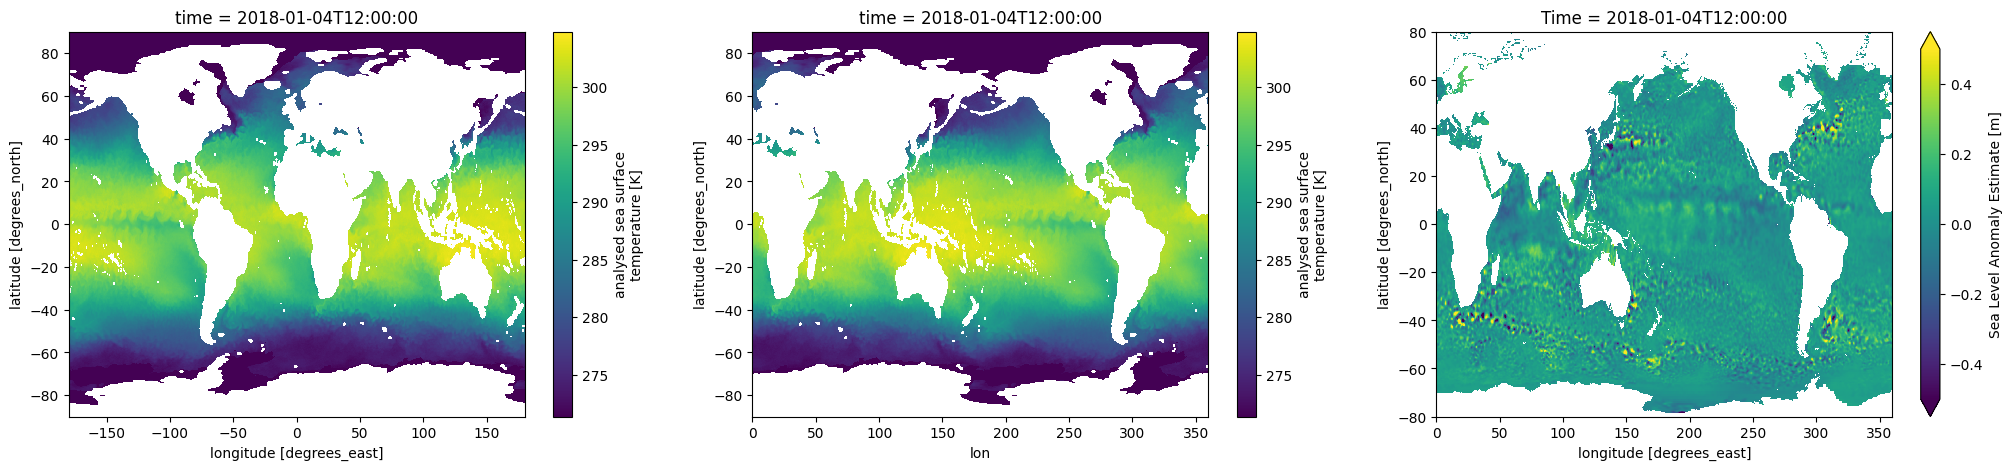

In [19]:
fig,ax=plt.subplots(1,3,figsize=(25,5))
sst['analysed_sst'][0,...].plot(ax=ax[0])

sst_copy=sst.copy()
sst_copy['lon']=sst_copy['lon'].data+180
sst_data=sst_copy['analysed_sst'][0,...].roll(lon=1440//2)
sst_data.plot(ax=ax[1])

sla.plot(ax=ax[2],vmin=-0.5,vmax=0.5)

In [20]:
sla

<xarray.DataArray 'SLA' (Latitude: 960, Longitude: 2160)>
[2073600 values with dtype=float32]
Coordinates:
  * Longitude  (Longitude) float32 0.08333 0.25 0.4167 ... 359.6 359.8 359.9
  * Latitude   (Latitude) float32 -79.92 -79.75 -79.58 ... 79.58 79.75 79.92
    Time       datetime64[ns] 2018-01-04T12:00:00
Attributes:
    units:          m
    long_name:      Sea Level Anomaly Estimate
    standard_name:  sea_surface_height_above_sea_level
    alias:          sea_surface_height_above_sea_level

## Interpolate 1/4-degree SST onto the 1/6-degree SSHA grid

In [21]:
sst0=sst_data.interp(lat=sla.Latitude).interp(lon=sla.Longitude)
sst0

<xarray.DataArray 'analysed_sst' (Latitude: 960, Longitude: 2160)>
array([[   nan,    nan,    nan, ...,    nan,    nan,    nan],
       [   nan,    nan,    nan, ...,    nan,    nan,    nan],
       [   nan,    nan,    nan, ...,    nan,    nan,    nan],
       ...,
       [   nan, 271.35, 271.35, ..., 271.35, 271.35,    nan],
       [   nan, 271.35, 271.35, ..., 271.35, 271.35,    nan],
       [   nan, 271.35, 271.35, ..., 271.35, 271.35,    nan]],
      dtype=float32)
Coordinates:
    time       datetime64[ns] 2018-01-04T12:00:00
    lat        (Latitude) float32 -79.92 -79.75 -79.58 ... 79.58 79.75 79.92
  * Latitude   (Latitude) float32 -79.92 -79.75 -79.58 ... 79.58 79.75 79.92
    Time       datetime64[ns] 2018-01-04T12:00:00
    lon        (Longitude) float32 0.08333 0.25 0.4167 ... 359.6 359.8 359.9
  * Longitude  (Longitude) float32 0.08333 0.25 0.4167 ... 359.6 359.8 359.9
Attributes:
    units:          K
    long_name:      analysed sea surface temperature
    standard_name:  sea_surface_foundation_temperature
    valid_min:      -200
    valid_max:      5000
    source:         REMSS-L3C-AMSR2,REMSS-L3C-GMI,REMSS-L3C-WindSat,REMSS-L4-MW

## Zoom in to a small area over Kuroshio Current Extension

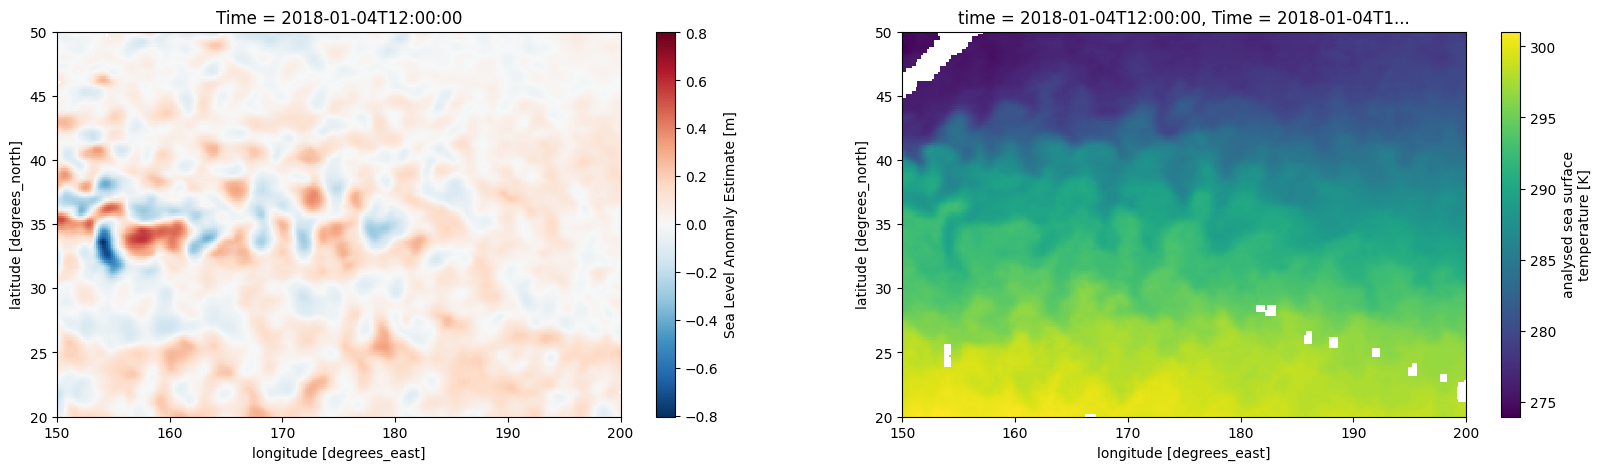

In [22]:
fig,ax=plt.subplots(1,2,figsize=(20,5))

sla.sel(Longitude=slice(150,200),Latitude=slice(20,50)).plot(ax=ax[0])

sst0.sel(Longitude=slice(150,200),Latitude=slice(20,50)).plot(ax=ax[1])

## Routines used to subtract a spatial anomaly from original field

In [23]:
def anomaly(lon,lat,var):
    from numpy import meshgrid,zeros,arange
    if len(lon.shape) == 1:
        x1,y1=meshgrid(lon,lat)
    else:
        x1,y1 = lon, lat
    if len(var.shape) == 2:
        va,vm = fit2Dsurf(x1,y1,var)
        return va,vm
    elif len(var.shape) == 3:
        vatmp = zeros(var.shape)
        vmtmp = zeros(var.shape)
        for i in arange(var.shape[0]):
            va,vm = fit2Dsurf(x1,y1,var[i,:,:])[0]
            vatmp[i,:,:] = va
            vmtmp[i,:,:] = vm
        return vatmp, vmtmp

def fit2Dsurf(x,y,p,kind='linear'):
    """
      given y0=f(t0), find the best fit
      p = a + bx + cy + dx**2 + ey**2 + fxy
      and return a,b,c,d,e,f
    """
    from scipy.optimize import leastsq
    import numpy as np

    def err(c,x0,y0,p):
        if kind=='linear':
            a,b,c=c
            return p - (a + b*x0 + c*y0 )
        if kind=='quadratic':
            a,b,c,d,e,f=c
            return p - (a + b*x0 + c*y0 + d*x0**2 + e*y0**2 + f*x0*y0)

    def surface(c,x0,y0):
        if kind=='linear':
            a,b,c=c
            return a + b*x0 + c*y0
        if kind=='quadratic':
            a,b,c,d,e,f=c
            return a + b*x0 + c*y0 + d*x0**2 + e*y0**2 + f*x0*y0

    #dpdy = (np.diff(p,axis=0)/np.diff(y,axis=0)).mean()
    #dpdx = (np.diff(p,axis=1)/np.diff(x,axis=1)).mean()
    dpdx=(p.max()-p.min())/(x.max()-x.min())
    dpdy=(p.max()-p.min())/(y.max()-y.min())
    xf=x.flatten()
    yf=y.flatten()
    pf=p.flatten()

    if kind=='linear':
        c = [pf.mean(),dpdx,dpdy]
    if kind=='quadratic':
        c = [pf.mean(),dpdx,dpdy,1e-22,1e-22,1e-22]

    coef = leastsq(err,c,args=(xf,yf,pf))[0]
    vm = surface(coef,x,y) #mean surface
    va = p - vm #anomaly
    return va,vm


## Show the SSTA and SSHA correlation by overlaying the two fields

The correlation coefficient between SSTA and SSHA is 0.72


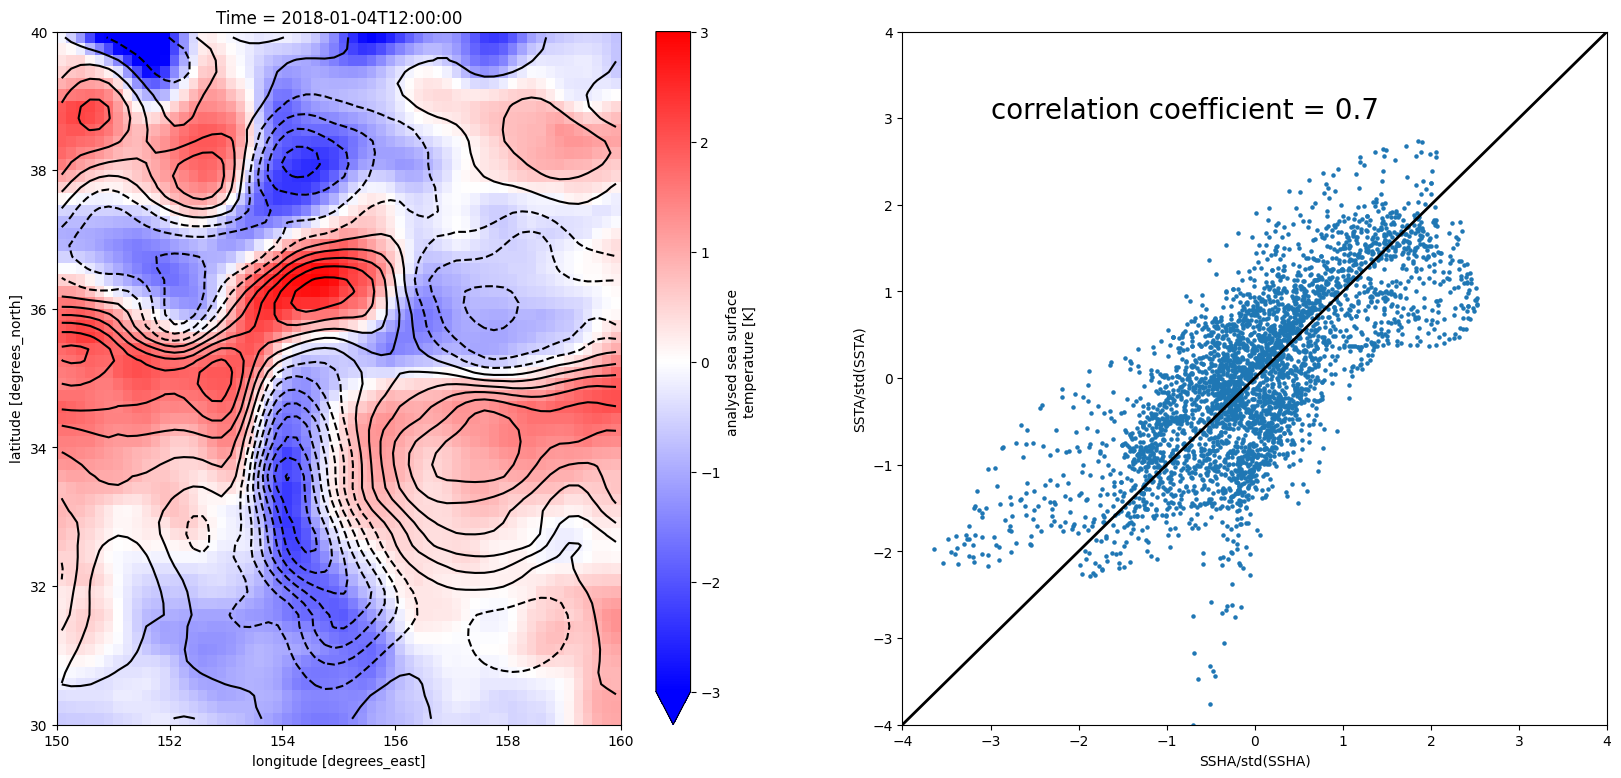

In [24]:
fig,ax=plt.subplots(1,2,figsize=(20,9))

sla1=sla.sel(Longitude=slice(150,160),Latitude=slice(30,40))
tmp,_=anomaly(sla1.Longitude,sla1.Latitude,sla1.data)
sla1.data=tmp

sst1=sst0.sel(Longitude=slice(150,160),Latitude=slice(30,40))
tmp,_=anomaly(sst1.Longitude,sst1.Latitude,sst1.data)
sst1.data=tmp

sst1.plot(ax=ax[0],vmin=-3,vmax=3,cmap=plt.cm.bwr)
sla1.plot.contour(ax=ax[0],levels=20,colors='k')

ax[1].scatter(sla1.data/sla1.data.std(),sst1.data/sst1.data.std(),s=5,marker='o')
ax[1].plot([-4,4],[-4,4],'k-',lw=2)
ax[1].set_xlim(-4,4)
ax[1].set_ylim(-4,4)
ax[1].set_ylabel("SSTA/std(SSTA)")
ax[1].set_xlabel("SSHA/std(SSHA)")

a,b=sst1.data.flatten(),sla1.data.flatten()
coef=(a*b).mean()/np.sqrt(a.var() * b.var())
ax[1].text(-3,3,'correlation coefficient = %3.1f'%coef,fontsize=20)
print("The correlation coefficient between SSTA and SSHA is %3.2f"%( coef ))

# Package all routines into a signal function

In [25]:
import boto3
import sys
from matplotlib import pylab as plt

import xarray as xr
import dask
import netCDF4 as nc
import numpy as np
import pandas as pd

import fsspec
import s3fs

def init_S3FileSystem():
    import requests,s3fs
    s3_cred_endpoint = {
        'podaac':'https://archive.podaac.earthdata.nasa.gov/s3credentials',
        'lpdaac':'https://data.lpdaac.earthdatacloud.nasa.gov/s3credentials'}

    temp_creds_url = s3_cred_endpoint['podaac']
    creds = requests.get(temp_creds_url).json()
    s3 = s3fs.S3FileSystem(anon=False,
                           key=creds['accessKeyId'],
                           secret=creds['secretAccessKey'], 
                           token=creds['sessionToken'])
    return s3

def anomaly(lon,lat,var):
    from numpy import meshgrid,zeros,arange
    if len(lon.shape) == 1:
        x1,y1=meshgrid(lon,lat)
    else:
        x1,y1 = lon, lat
    if len(var.shape) == 2:
        va,vm = fit2Dsurf(x1,y1,var)
        return va,vm
    elif len(var.shape) == 3:
        vatmp = zeros(var.shape)
        vmtmp = zeros(var.shape)
        for i in arange(var.shape[0]):
            va,vm = fit2Dsurf(x1,y1,var[i,:,:])[0]
            vatmp[i,:,:] = va
            vmtmp[i,:,:] = vm
        return vatmp, vmtmp

def fit2Dsurf(x,y,p,kind='linear'):
    """
      given y0=f(t0), find the best fit
      p = a + bx + cy + dx**2 + ey**2 + fxy
      and return a,b,c,d,e,f
    """
    from scipy.optimize import leastsq
    import numpy as np

    def err(c,x0,y0,p):
        if kind=='linear':
            a,b,c=c
            return p - (a + b*x0 + c*y0 )
        if kind=='quadratic':
            a,b,c,d,e,f=c
            return p - (a + b*x0 + c*y0 + d*x0**2 + e*y0**2 + f*x0*y0)

    def surface(c,x0,y0):
        if kind=='linear':
            a,b,c=c
            return a + b*x0 + c*y0
        if kind=='quadratic':
            a,b,c,d,e,f=c
            return a + b*x0 + c*y0 + d*x0**2 + e*y0**2 + f*x0*y0

    #dpdy = (np.diff(p,axis=0)/np.diff(y,axis=0)).mean()
    #dpdx = (np.diff(p,axis=1)/np.diff(x,axis=1)).mean()
    msk=~np.isnan(p)
    xx=x.copy()
    yy=y.copy()
    pp=p.copy()
    
    p=p[msk]
    x=x[msk]
    y=y[msk]
    
    dpdx=(p.max()-p.min())/(x.max()-x.min())
    dpdy=(p.max()-p.min())/(y.max()-y.min())
    
    xf=x.flatten()
    yf=y.flatten()
    pf=p.flatten()

    if kind=='linear':
        c = [pf.mean(),dpdx,dpdy]
    if kind=='quadratic':
        c = [pf.mean(),dpdx,dpdy,1e-22,1e-22,1e-22]

    coef = leastsq(err,c,args=(xf,yf,pf))[0]
    vm = surface(coef,xx,yy) #mean surface
    va = pp - vm #anomaly
    return va,vm


def load_sst_ssh(ssh_fn,sub_domain=[150,160,30,50]):
    """
    ssh_fns: list, filenames of SSH fields
    sub_domain: list, [lon_start,lon_end,lat_start,lat_end]
    
    Return
    ======
    coef: Array like
          Time series of correlation over the given subdomain
    """    
    lo0,lo1,la0,la1=sub_domain
    
    s3sys=init_S3FileSystem()
    ffs=s3sys.open(ssh_fn)
    ssh=xr.open_dataset(ffs)['SLA'][0,...].T.sel(Longitude=slice(lo0,lo1),Latitude=slice(la0,la1))
    # 'podaac-ops-cumulus-protected/SEA_SURFACE_HEIGHT_ALT_GRIDS_L4_2SATS_5DAY_6THDEG_V_JPL1812/ssh_grids_v1812_2018010412.nc'
    del ffs
    tt=ssh_fn.split('_')[-1][:8]
    sst_fn='podaac-ops-cumulus-protected/MW_OI-REMSS-L4-GLOB-v5.0/%s120000-REMSS-L4_GHRSST-SSTfnd-MW_OI-GLOB-v02.0-fv05.0.nc'%tt
    ffs=s3sys.open(sst_fn)
    sst=xr.open_dataset(ffs)['analysed_sst'][0,...].sel(lon=slice(lo0,lo1),lat=slice(la0,la1))
    del ffs
    
    return ssh,sst

def calculate_correlation(ssh_fn,sub_domain=[150,160,30,50]):
    ssh,sst=load_sst_ssh(ssh_fn,sub_domain)
    sst=sst.interp(lon=ssh.Longitude).interp(lat=ssh.Latitude)
    
    ssha,_=anomaly(ssh.Longitude,ssh.Latitude,ssh.data)
    ssh.data=ssha
    ssta,_=anomaly(sst.Longitude,sst.Latitude,sst.data)
    sst.data=ssta
    
    a,b=sst.data.flatten(),ssh.data.flatten()
    coef=np.nanmean(a*b)/np.sqrt(np.nanvar(a) * np.nanvar(b))
    
    return coef

In [26]:
s3sys=init_S3FileSystem()

ssh_fns=s3sys.glob('s3://podaac-ops-cumulus-protected/SEA_SURFACE_HEIGHT_ALT_GRIDS_L4_2SATS_5DAY_6THDEG_V_JPL1812/*201801*.nc')

sub_domain=[150,155,30,35]


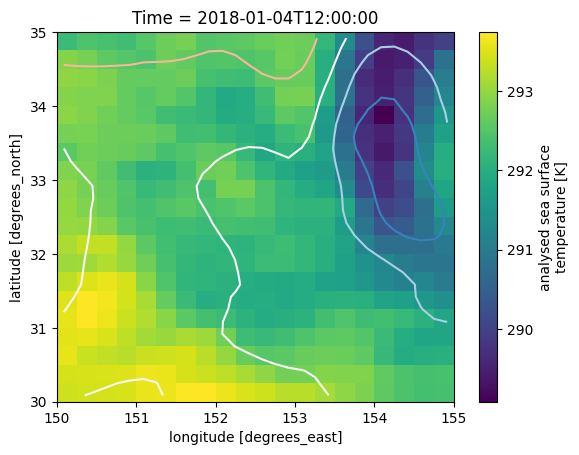

In [27]:
ssh,sst=load_sst_ssh(ssh_fns[0],sub_domain)
sst.plot()
ssh.plot.contour()

In [30]:
%%time

coef=[]
for ssh_fn in ssh_fns[:]:
    print(ssh_fn)
    coef.append(calculate_correlation(ssh_fn,sub_domain))
print(coef)

podaac-ops-cumulus-protected/SEA_SURFACE_HEIGHT_ALT_GRIDS_L4_2SATS_5DAY_6THDEG_V_JPL1812/ssh_grids_v1812_2018010412.nc
podaac-ops-cumulus-protected/SEA_SURFACE_HEIGHT_ALT_GRIDS_L4_2SATS_5DAY_6THDEG_V_JPL1812/ssh_grids_v1812_2018010912.nc
podaac-ops-cumulus-protected/SEA_SURFACE_HEIGHT_ALT_GRIDS_L4_2SATS_5DAY_6THDEG_V_JPL1812/ssh_grids_v1812_2018011412.nc
podaac-ops-cumulus-protected/SEA_SURFACE_HEIGHT_ALT_GRIDS_L4_2SATS_5DAY_6THDEG_V_JPL1812/ssh_grids_v1812_2018011912.nc
podaac-ops-cumulus-protected/SEA_SURFACE_HEIGHT_ALT_GRIDS_L4_2SATS_5DAY_6THDEG_V_JPL1812/ssh_grids_v1812_2018012412.nc
podaac-ops-cumulus-protected/SEA_SURFACE_HEIGHT_ALT_GRIDS_L4_2SATS_5DAY_6THDEG_V_JPL1812/ssh_grids_v1812_2018012912.nc
[0.7411544, 0.76892567, 0.69254154, 0.7824478, 0.6873856, 0.7708496]
CPU times: user 1.67 s, sys: 133 ms, total: 1.81 s
Wall time: 19.2 s


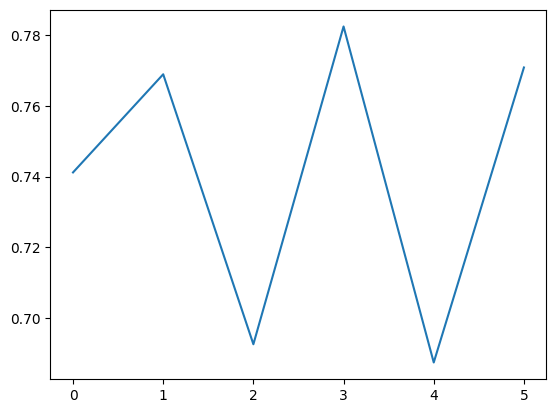

In [29]:
plt.plot(coef)

## Extra Code by Dean 
(Assessment of computation time requirements to analyze all gridpoints in a signle set of SSH-SST files)

It takes ~18 seconds to analyze a single gridpoint from 6 files, which comes to 3 seconds per point. Even if we assume that 2 of those seconds are from loading the file or accessing the S3 filesystem, we are still at 1 second per gridpoint.

The SSH grid is 960 x 2160 which comes to:

In [31]:
print(str(960*2160) + " points")

2073600 points


Therefore, at 1 second per point, the time taken to analyse all points in a single file is:

In [33]:
t_minutes = 960*2160*1/60
print(str(t_minutes) + " minutes = " + str(t_minutes/60) + " hours")

34560.0 minutes = 576.0 hours
